# Retail project

### Problem Statement
It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.

Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits

Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).

### Dataset Description
This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.

## Project Tasks

#### 1. Data Cleaning:

Perform a preliminary data inspection and data cleaning.

a. Check for missing data and formulate an apt strategy to treat them.

b. Remove duplicate data records.

c. Perform descriptive analytics on the given data.

#### 2. Data Transformation:

Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

a. Create month cohorts and analyze active customers for each cohort.

b. Analyze the retention rate of customers.

#### 3(a). Data Modeling :

a. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

b. Calculate RFM metrics.

c. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

b1. Combine three ratings to get a RFM segment (as strings).

b2. Get the RFM score by adding up the three ratings.

b3. Analyze the RFM segments by summarizing them and comment on the findings.

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.
Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

#### 3(b). Data Modeling :

a. Create clusters using k-means clustering algorithm.

b. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

c. Decide the optimum number of clusters to be formed.

d. Analyze these clusters and comment on the results.

#### Data Reporting:

Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

c. Bar graph to show the count of orders vs. hours throughout the day

d. Plot the distribution of RFM values using histogram and frequency charts

e. Plot error (cost) vs. number of clusters selected

f. Visualize to compare the RFM values of the clusters using heatmap

In [468]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import datetime as dt

**Read the excel file**

In [20]:
## To read the files from different directory

df = pd.read_excel(r'C:\Users\SPaswan\Downloads\Daily chronic report last week.xlsx')
df.head(2)

,Lookup?,0
0,NaN,NaN
1,Row Labels,Count of Configuration item


In [15]:
## How to find the different sheets linked with the excel?

xls = pd.ExcelFile(r'C:\Users\SPaswan\Downloads\Daily chronic report last week.xlsx')
sheets = xls.sheet_names

In [16]:
sheets

['Events', 'Incident']

In [17]:
## here we can find that there are two sheets linked with the excel file "Daily chronic report last week"

In [19]:
## How to open the second sheet?
df2 = pd.read_excel(r'C:\Users\SPaswan\Downloads\Daily chronic report last week.xlsx',sheet_name='Incident')
df2.head(2)

,Number,Company,Priority,Caller,Assigned to,State,Category,Assignment group,Incident state,Opened,Updated,Parent Incident,Configuration item,Lookup?,SN Event Policy,Cause Subcategory,Short description
0,INC1437084,NaN,4 - Low,Messenger,NaN,Canceled,NaN,MSC Support Specialists,Canceled,2022-12-17 17:07:07,2022-12-17 17:14:57,NaN,NaN,NaN,NaN,NaN,Webex meeting invitation: 694755050:WIRELESS A...
1,INC1436371,NaN,4 - Low,Ticketautomailer,NaN,Canceled,NaN,MSC Support Specialists,Canceled,2022-12-16 10:33:04,2022-12-16 11:09:24,NaN,NaN,NaN,NaN,NaN,Ticket #6791307 Updated


In [ ]:
train = pd.read_excel('Online Retail.xlsx', parse_dates=['InvoiceDate'])
train.head()

In [21]:
train = pd.read_excel('Online Retail.xlsx')

In [22]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [25]:
train.shape

(541909, 8)

**Check for null values**

In [27]:
train.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Check for duplicates**

In [29]:
train.duplicated().sum()

5268

In [30]:
print(f'Duplicate items in train dataset is {train.duplicated().sum()}')

Duplicate items in train dataset is 5268


In [32]:
print("duplicate: ", train.duplicated().sum())

duplicate:  5268


**Remove duplicate items**

In [33]:
train = train[~train.duplicated()]

In [34]:
train.shape

(536641, 8)

**Other ways to remove duplicates:**
* train.drop_duplicates()
**To remove duplicates from multiple columns & keep*:
*train.drop_duplicates(subset=['Description','Customer Id'], keep = 'last')


In [35]:
train.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

**Check, what % of coulmns are missing?**

In [49]:
135037/len(train.CustomerID)* 100

## Customer Id: 25% data are missing

25.163377378918124

In [50]:
## If required to check this for all the columns then we can create a defintion

In [55]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    #Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + "columns"+"There are " + str(mis_val_table_ren_columns.shape[0]) +"columns that,have missing values")
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [56]:
missing_values_table(train)

Your selected dataframe has 8columnsThere are 2columns that,have missing values


,Missing Values,% of Total Values
CustomerID,135037,25.2
Description,1454,0.3


In [68]:
## Converting Invoice no. from dataframe to list
Invoice_list = train[train.CustomerID.isnull()]['InvoiceNo'].tolist()

In [71]:
Invoice_list[:5]

[536414, 536544, 536544, 536544, 536544]

In [ ]:
len(train[train.InvoiceNo.isin(Invoice_list)])

In [76]:
len(train[train.InvoiceNo.isin(Invoice_list)])

135037

In [77]:
rfm_train = train[train.CustomerID.notnull()].copy()

In [78]:
rfm_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [79]:
rfm_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [85]:
## Convert data type of customer id to integer:
rfm_train.CustomerID= rfm_train.CustomerID.astype(int)

In [87]:
rfm_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int32         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.0+ MB


In [89]:
missing_values_table(rfm_train)

Your selected dataframe has 8columnsThere are 0columns that,have missing values


,Missing Values,% of Total Values


In [102]:
## Check cancelled invoice ids:
desc_df = rfm_train[~rfm_train.InvoiceNo.str.contains('C', na=False)]

In [101]:
desc_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [107]:
rfm_train[rfm_train.InvoiceNo.str.contains('C',na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [108]:
desc_df['Total_cost'] = rfm_train.Quantity * rfm_train.UnitPrice

C:\Users\SPaswan\AppData\Local\Temp\ipykernel_5868\1136334178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desc_df['Total_cost'] = rfm_train.Quantity * rfm_train.UnitPrice


In [110]:
desc_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [121]:
# Check the oldest and latest date in the dataset.
print('Oldest date is:', desc_df.InvoiceDate.min())
print('Latest date is:', desc_df.InvoiceDate.max())

Oldest date is: 2010-12-01 08:26:00
Latest date is: 2011-12-09 12:50:00


In [194]:
## Country wise customers: 
desc_df.Country.value_counts(normalize=True).head(10).mul(100).round(1).astype(str)+'%'

United Kingdom    88.9%
Germany            2.3%
France             2.1%
EIRE               1.8%
Spain              0.6%
Netherlands        0.6%
Belgium            0.5%
Switzerland        0.5%
Portugal           0.4%
Australia          0.3%
Name: Country, dtype: object

<AxesSubplot:title={'center':'Country wise invoices'}>

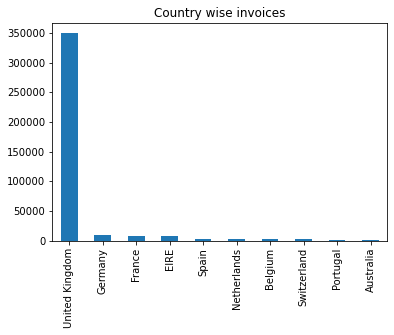

In [201]:
dd= desc_df.Country.value_counts().head(10)
dd.plot(kind ='bar',title = 'Country wise invoices')

In [ ]:
## Find year wise invoice generated:
## Note: If the ask would to fing month, day or weekend, we will use: dt.month,day,weekday,hour,minutes

In [140]:
desc_df.InvoiceDate

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392732, dtype: datetime64[ns]

<AxesSubplot:>

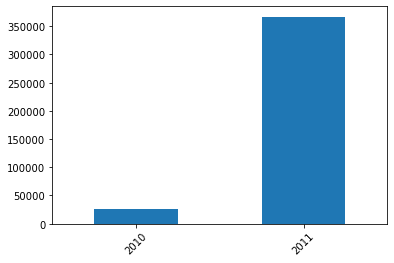

In [154]:
## to find only years out of it, then convert the dataframe to object

desc_df.InvoiceDate.dt.year.value_counts(sort=False).plot(kind='bar',rot=45)

## rot = 45 is used to rotate the x axis

In [217]:
## Month wise total invoice generated

<AxesSubplot:>

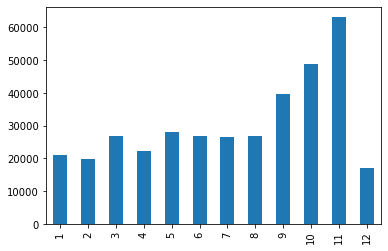

In [216]:
desc_df[desc_df.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar')

In [230]:
monthly_gross = desc_df[desc_df.InvoiceDate.dt.year==2011].groupby(desc_df.InvoiceDate.dt.month).Total_cost.sum()
monthly_gross

InvoiceDate
1      568101.310
2      446084.920
3      594081.760
4      468374.331
5      677355.150
6      660046.050
7      598962.901
8      644051.040
9      950690.202
10    1035642.450
11    1156205.610
12     517190.440
Name: Total_cost, dtype: float64

In [241]:
monthly_gross.values

array([ 568101.31 ,  446084.92 ,  594081.76 ,  468374.331,  677355.15 ,
        660046.05 ,  598962.901,  644051.04 ,  950690.202, 1035642.45 ,
       1156205.61 ,  517190.44 ])

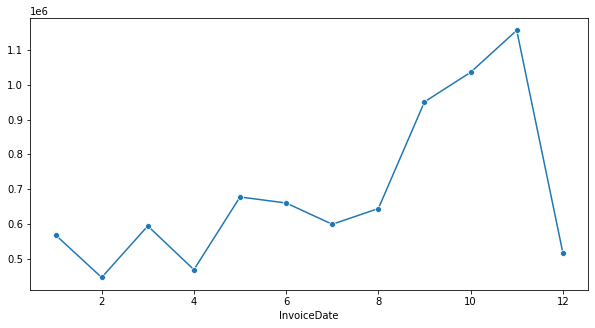

In [244]:
plt.figure(figsize=(10,5))
sns.lineplot(y=monthly_gross.values,x=monthly_gross.index, marker='o')
plt.show()

In [307]:
## Total Quantity sold by country

desc_df[desc_df.InvoiceDate.dt.year==2011].groupby('Country', sort=False).Quantity.sum()

Country
United Kingdom          3987460
Sweden                    32124
France                   106440
Australia                 83742
Germany                  112290
Spain                     27077
Portugal                  15111
EIRE                     135130
Cyprus                     5424
Belgium                   21482
Italy                      7817
Netherlands              194126
Poland                     3544
Switzerland               29369
Finland                    9450
Greece                     1557
Singapore                  5241
Iceland                    2139
Channel Islands            9405
Lebanon                     386
Austria                    4830
Norway                    15756
Japan                     21923
United Arab Emirates        982
Israel                     4043
Denmark                    7781
Saudi Arabia                 80
Czech Republic              671
Canada                     2763
Unspecified                1785
Brazil                      356


C:\Users\SPaswan\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


Text(0.5, 1.0, 'Total Quantity')

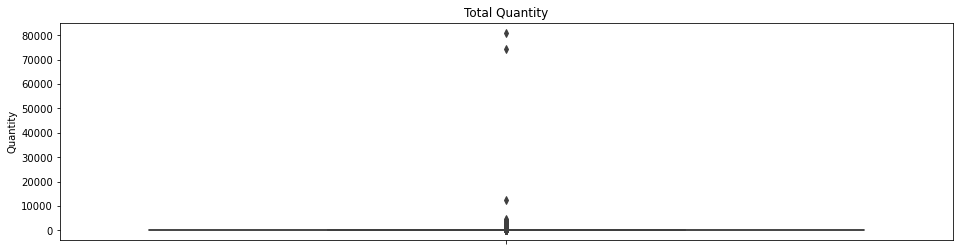

In [261]:
plt.figure(figsize=(16,4))
sns.boxplot(y='Quantity', data=desc_df, orient='h')
plt.title('Total Quantity')

C:\Users\SPaswan\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


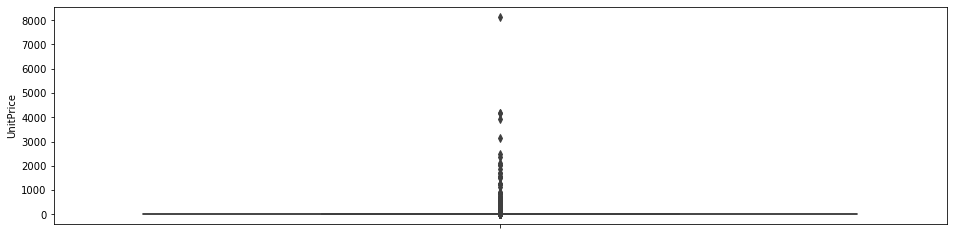

In [251]:
plt.figure(figsize=(16,4))
sns.boxplot(y='UnitPrice', data=desc_df, orient='h');

In [252]:
desc_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [258]:
desc_df['Description'].value_counts()[:20]

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
SPOTTY BUNTING                        1014
PAPER CHAIN KIT 50'S CHRISTMAS        1003
LUNCH BAG SPACEBOY DESIGN              993
HEART OF WICKER SMALL                  979
LUNCH BAG CARS BLUE                    977
NATURAL SLATE HEART CHALKBOARD         972
LUNCH BAG PINK POLKADOT                941
LUNCH BAG SUKI DESIGN                  915
REX CASH+CARRY JUMBO SHOPPER           897
ALARM CLOCK BAKELIKE RED               886
Name: Description, dtype: int64

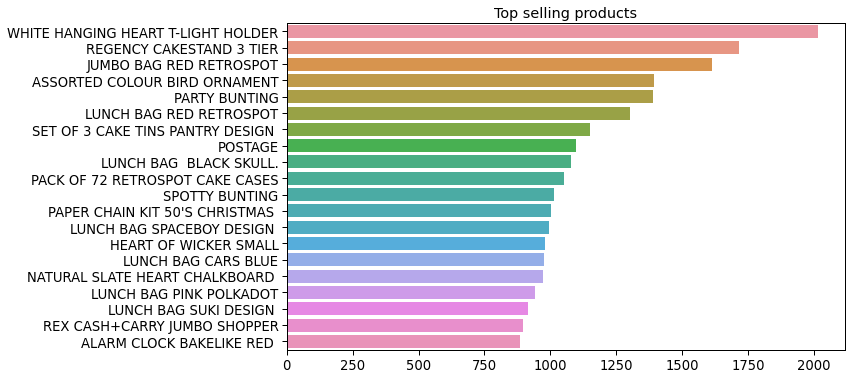

In [262]:
# Let's visualize some top products from the whole range.
top_products = desc_df['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,x = top_products.values)
plt.title("Top selling products")
plt.show()

### 2. Data Transformation:


In [264]:
cohort = rfm_train.copy()

In [334]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)
# Create InvoiceMonth column
cohort['InvoiceMonth'] = cohort['InvoiceDate'].apply(get_month)
# Group by CustomerID and select the InvoiceMonth value
grouping = cohort.groupby('CustomerID')['InvoiceMonth']
# Assign a minimum InvoiceMonth value to the dataset
cohort['CohortMonth'] = grouping.transform('min')

In [337]:
cohort.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01


⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛

In [338]:
## Meaning of tranform:

In [316]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two'],
                  'C' : [1, 5, 5, 2, 5, 5],
                   'D' : [2.0, 5., 8., 1., 2., 9.]})

In [317]:
df

,A,B,C,D
0,foo,one,1,2.0
1,bar,one,5,5.0
2,foo,two,5,8.0
3,bar,three,2,1.0
4,foo,two,5,2.0
5,bar,two,5,9.0


In [319]:
grouped = df.groupby('A')
grouped

In [332]:
grouped.transform('min')

,B,C,D
0,one,1,2.0
1,one,2,1.0
2,one,1,2.0
3,one,2,1.0
4,one,1,2.0
5,one,2,1.0


In [333]:
grouped.transform('max')

,B,C,D
0,two,5,8.0
1,two,5,9.0
2,two,5,8.0
3,two,5,9.0
4,two,5,8.0
5,two,5,9.0


⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛⌛

In [341]:
## Create a fucntion to fetch year and month from a dataframe and columns

In [340]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [344]:
invoice_year, invoice_month = get_date_int(cohort,'InvoiceMonth')
# Get the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month = get_date_int(cohort,'CohortMonth')

In [347]:
years_diff = invoice_year - cohort_year
# Calculate difference in months
months_diff = invoice_month - cohort_month
# Extract the difference in months from all previous values
cohort['CohortIndex'] = years_diff * 12 + months_diff + 1

In [349]:
cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1


In [352]:
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])

In [384]:
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data.head(4)

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367


In [387]:
ss = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
ss.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN


In [379]:
ss.iloc[:,0]

CohortMonth
2010-12-01    948.0
2011-01-01    421.0
2011-02-01    380.0
2011-03-01    440.0
2011-04-01    299.0
2011-05-01    279.0
2011-06-01    235.0
2011-07-01    191.0
2011-08-01    167.0
2011-09-01    298.0
2011-10-01    352.0
2011-11-01    321.0
2011-12-01     41.0
Name: 1, dtype: float64

In [389]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()
# Create a pivot
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex',values='CustomerID')
# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]
# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11","May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
"Oct '11", "Nov '11", "Dec '11"]

<AxesSubplot:title={'center':'Retention by Monthly Cohorts'}, xlabel='CohortIndex', ylabel='CohortMonth'>

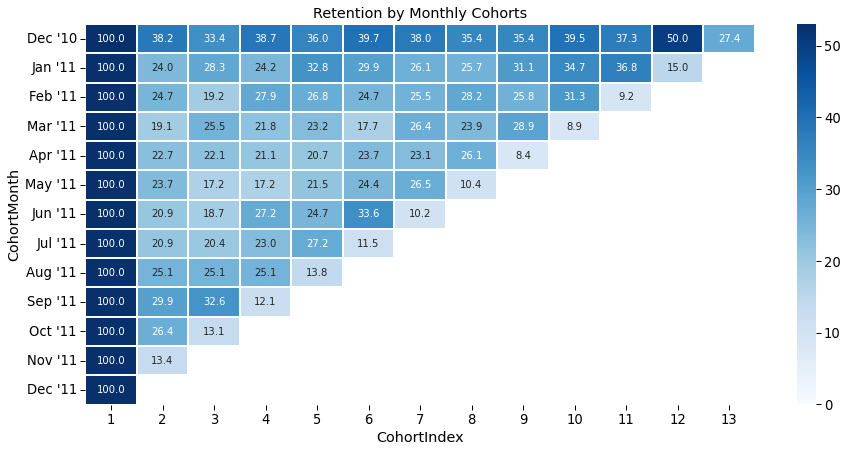

In [395]:
# Initialize inches plot figure
plt.figure(figsize=(15,7))
# Add a title
plt.title('Retention by Monthly Cohorts')
# Create the heatmap
sns.heatmap(data=retention,annot = True,cmap = "Blues",vmin = 0.0,# vmax = 0.5,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,fmt = '.1f',
            linewidth = 0.3,yticklabels=month_list)

In [396]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])
# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()
# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()
# Create a pivot
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex',values='UnitPrice')
average_price.round(1)
average_price.index = average_price.index.date

In [397]:
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])
# Calculate the average of the Quantity column
cohort_data = grouping['Quantity'].mean()
# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()
# Create a pivot
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex', values='Quantity')
# average_quantity.round(1)

<AxesSubplot:title={'center':'Average Quantity per Monthly Cohorts'}, xlabel='CohortIndex', ylabel='CohortMonth'>

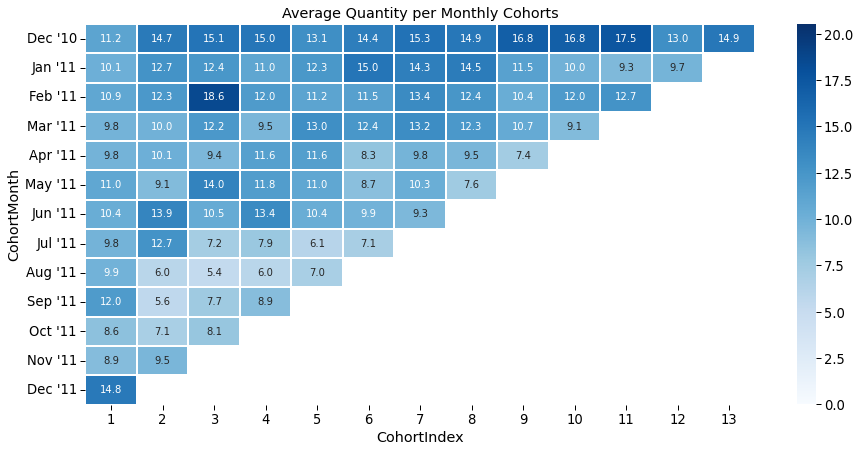

In [398]:
plt.figure(figsize=(15, 7))
# Add a title
plt.title('Average Quantity per Monthly Cohorts')
# Create the heatmap
sns.heatmap(data = average_quantity,annot=True,vmin = 0.0,cmap='Blues',
            vmax = list(average_quantity.max().sort_values(ascending = False))[1]+3,fmt = '.1f',
            linewidth = 0.3,yticklabels=month_list)

## Data Modeling :

In [399]:
rfm_train['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [400]:
current_date = dt.date(2011,12,9)

In [401]:
rfm_train['Purchase_Date'] = rfm_train.InvoiceDate.dt.date

In [402]:
recency = rfm_train.groupby('CustomerID')['Purchase_Date'].max().reset_index()

In [403]:
recency = recency.assign(Current_Date = current_date)

In [404]:
recency['Recency'] = recency.Purchase_Date.apply(lambda x: (current_date - x).days)

In [413]:
recency.head(7)

,CustomerID,Purchase_Date,Current_Date,Recency
0,12346,2011-01-18,2011-12-09,325
1,12347,2011-12-07,2011-12-09,2
2,12348,2011-09-25,2011-12-09,75
3,12349,2011-11-21,2011-12-09,18
4,12350,2011-02-02,2011-12-09,310
5,12352,2011-11-03,2011-12-09,36
6,12353,2011-05-19,2011-12-09,204


In [406]:
frequency = rfm_train.groupby('CustomerID').InvoiceNo.nunique().reset_index().rename(columns={'InvoiceNo':'Frequency'})

In [407]:
frequency.head()

,CustomerID,Frequency
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [408]:
rfm_train['Total_cost'] = rfm_train.Quantity * rfm_train.UnitPrice

In [409]:
monetary = rfm_train.groupby('CustomerID').Total_cost.sum().reset_index().rename(columns={'Total_cost':'Monetary'})

In [410]:
monetary.head()

,CustomerID,Monetary
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [425]:
temp_ = recency.merge(frequency, on='CustomerID')
rfm_table = temp_.merge(monetary, on='CustomerID')

In [426]:
temp_.head()

,CustomerID,Purchase_Date,Current_Date,Recency,Frequency
0,12346,2011-01-18,2011-12-09,325,2
1,12347,2011-12-07,2011-12-09,2,7
2,12348,2011-09-25,2011-12-09,75,4
3,12349,2011-11-21,2011-12-09,18,1
4,12350,2011-02-02,2011-12-09,310,1


In [427]:
rfm_table.head()

,CustomerID,Purchase_Date,Current_Date,Recency,Frequency,Monetary
0,12346,2011-01-18,2011-12-09,325,2,0.00
1,12347,2011-12-07,2011-12-09,2,7,4310.00
2,12348,2011-09-25,2011-12-09,75,4,1797.24
3,12349,2011-11-21,2011-12-09,18,1,1757.55
4,12350,2011-02-02,2011-12-09,310,1,334.40


In [428]:
rfm_table.set_index('CustomerID',inplace=True)
rfm_table.head()

,Purchase_Date,Current_Date,Recency,Frequency,Monetary
CustomerID,,,,,
12346,2011-01-18,2011-12-09,325,2,0.00
12347,2011-12-07,2011-12-09,2,7,4310.00
12348,2011-09-25,2011-12-09,75,4,1797.24
12349,2011-11-21,2011-12-09,18,1,1757.55
12350,2011-02-02,2011-12-09,310,1,334.40


In [429]:
rfm_train[rfm_train.CustomerID == rfm_table.index[0]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchase_Date,Total_cost
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,2011-01-18,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,2011-01-18,-77183.6


In [433]:
(current_date - rfm_train[rfm_train.CustomerID == rfm_table.index[0]].iloc[0].Purchase_Date).days == rfm_table.iloc[0,0]

False

In [434]:
# RFM Quantiles
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,16.0,1.0,291.795
0.50,50.0,3.0,644.070
0.75,143.0,5.0,1608.335


In [435]:
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0},
 'Monetary': {0.25: 291.795, 0.5: 644.0699999999999, 0.75: 1608.335}}

In [436]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [437]:
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [439]:
rfm_segment = rfm_table.copy()
rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(RScore,args=('Recency',quantiles))
rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(FMScore,args=('Frequency',quantiles,))
rfm_segment['M_Quartile'] = rfm_segment['Monetary'].apply(FMScore,args=('Monetary',quantiles,))

In [440]:
rfm_segment.head()

,Purchase_Date,Current_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,,,
12346,2011-01-18,2011-12-09,325,2,0.00,1,2,1
12347,2011-12-07,2011-12-09,2,7,4310.00,4,4,4
12348,2011-09-25,2011-12-09,75,4,1797.24,2,3,4
12349,2011-11-21,2011-12-09,18,1,1757.55,3,1,4
12350,2011-02-02,2011-12-09,310,1,334.40,1,1,2


In [441]:
rfm_segment['RFMScore'] = rfm_segment.R_Quartile.map(str)+ rfm_segment.F_Quartile.map(str)+ rfm_segment.M_Quartile.map(str)
rfm_segment.head()

,Purchase_Date,Current_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,,
12346,2011-01-18,2011-12-09,325,2,0.00,1,2,1,121
12347,2011-12-07,2011-12-09,2,7,4310.00,4,4,4,444
12348,2011-09-25,2011-12-09,75,4,1797.24,2,3,4,234
12349,2011-11-21,2011-12-09,18,1,1757.55,3,1,4,314
12350,2011-02-02,2011-12-09,310,1,334.40,1,1,2,112


In [451]:
rfm_segment['RFMScore'].unique()

array(['121', '444', '234', '314', '112', '343', '111', '113', '324',
       '423', '224', '222', '433', '122', '411', '223', '313', '422',
       '124', '214', '334', '144', '322', '212', '312', '233', '114',
       '344', '244', '123', '213', '434', '311', '424', '221', '443',
       '413', '331', '321', '323', '421', '332', '134', '142', '211',
       '232', '412', '432', '133', '243', '333', '132', '143', '231',
       '431', '242', '141', '342', '131', '442', '414', '241', '441'],
      dtype=object)

In [442]:
# Reset the index to create a customer_ID column
rfm_segment.reset_index(inplace=True)

In [443]:
segment_dict = {
    'Best Customers':'444', # Highest frequency as well as monetary value with least recency
    'Loyal Customers':'344', # High frequency as well as monetary value with good recency
    'Big Spenders':'334', # High monetary value but good recency and frequency values
    'Almost Lost':'244', # Customer's shopping less often now who used to shop a lot
    'Lost Customers':'144', # Customer's shopped long ago who used to shop a lot
    'Recent Customers':'443', # Customer's who recently started shopping a lot but with less monetary value
    'Lost Cheap Customers':'122' # Customer's shopped long ago but with less frequency and monetary value
}

In [445]:
dict_segment = dict(zip(segment_dict.values(),segment_dict.keys()))

In [447]:
rfm_segment['Segment'] = rfm_segment.RFMScore.map(lambda x: dict_segment.get(x))

In [448]:
rfm_segment.Segment.fillna('others', inplace=True)

In [449]:
rfm_segment.sample(10)

,CustomerID,Purchase_Date,Current_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
402,12851,2011-09-04,2011-12-09,96,1,131.81,2,1,1,211,others
3323,16837,2011-11-08,2011-12-09,31,12,3167.73,3,4,4,344,Loyal Customers
342,12763,2011-07-24,2011-12-09,138,2,494.08,2,2,2,222,others
4070,17878,2011-10-27,2011-12-09,43,1,379.45,3,1,2,312,others
3467,17042,2011-12-07,2011-12-09,2,5,1036.58,4,3,3,433,others
2658,15940,2011-02-01,2011-12-09,311,2,31.80,1,2,1,121,others
823,13436,2011-12-08,2011-12-09,1,1,196.89,4,1,1,411,others
3931,17682,2011-11-29,2011-12-09,10,7,2459.33,4,4,4,444,Best Customers
3738,17425,2011-11-20,2011-12-09,19,2,759.17,3,2,3,323,others
659,13211,2011-11-29,2011-12-09,10,3,1095.42,4,2,3,423,others


In [452]:
rfm_segment[rfm_segment.RFMScore=='444'].sort_values('Monetary',ascending=False).head()

,CustomerID,Purchase_Date,Current_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
1703,14646,2011-12-08,2011-12-09,1,77,279489.02,4,4,4,444,Best Customers
4233,18102,2011-12-09,2011-12-09,0,62,256438.49,4,4,4,444,Best Customers
3758,17450,2011-12-01,2011-12-09,8,55,187322.17,4,4,4,444,Best Customers
1895,14911,2011-12-08,2011-12-09,1,248,132458.73,4,4,4,444,Best Customers
1345,14156,2011-11-30,2011-12-09,9,66,113214.59,4,4,4,444,Best Customers


In [453]:
rfm_segment[rfm_segment.RFMScore=='334'].sort_values('Monetary',ascending=False).head()

,CustomerID,Purchase_Date,Current_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
2794,16126,2011-11-10,2011-12-09,29,4,6287.77,3,3,4,334,Big Spenders
737,13316,2011-11-02,2011-12-09,37,5,5570.69,3,3,4,334,Big Spenders
2923,16303,2011-11-14,2011-12-09,25,4,5305.83,3,3,4,334,Big Spenders
2897,16258,2011-10-25,2011-12-09,45,5,5203.51,3,3,4,334,Big Spenders
70,12432,2011-10-28,2011-12-09,42,5,5059.32,3,3,4,334,Big Spenders


In [454]:
rfm_segment[rfm_segment.RFMScore=='244'].sort_values('Monetary',ascending=False).head()

,CustomerID,Purchase_Date,Current_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
464,12939,2011-10-06,2011-12-09,64,8,11581.80,2,4,4,244,Almost Lost
50,12409,2011-09-22,2011-12-09,78,7,11056.93,2,4,4,244,Almost Lost
2836,16180,2011-08-31,2011-12-09,100,10,10217.48,2,4,4,244,Almost Lost
328,12744,2011-10-19,2011-12-09,51,10,9120.39,2,4,4,244,Almost Lost
3248,16745,2011-09-14,2011-12-09,86,18,7157.10,2,4,4,244,Almost Lost


In [455]:
rfm_segment[rfm_segment.RFMScore=='122'].sort_values('Monetary',ascending=False).head()

,CustomerID,Purchase_Date,Current_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
1578,14481,2011-06-28,2011-12-09,164,2,636.51,1,2,2,122,Lost Cheap Customers
2246,15384,2011-06-23,2011-12-09,169,3,635.76,1,2,2,122,Lost Cheap Customers
1230,14000,2011-05-17,2011-12-09,206,2,633.71,1,2,2,122,Lost Cheap Customers
1985,15045,2011-07-11,2011-12-09,151,3,633.66,1,2,2,122,Lost Cheap Customers
1391,14220,2011-04-06,2011-12-09,247,2,632.40,1,2,2,122,Lost Cheap Customers


In [456]:
rfm_segment[rfm_segment.RFMScore=='344'].sort_values('Monetary',ascending=False).head()

,CustomerID,Purchase_Date,Current_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
55,12415,2011-11-15,2011-12-09,24,26,123725.45,3,4,4,344,Loyal Customers
2722,16029,2011-11-01,2011-12-09,38,76,53168.69,3,4,4,344,Loyal Customers
3014,16422,2011-11-22,2011-12-09,17,75,33805.69,3,4,4,344,Loyal Customers
458,12931,2011-11-18,2011-12-09,21,20,33462.81,3,4,4,344,Loyal Customers
1728,14680,2011-11-14,2011-12-09,25,23,26932.34,3,4,4,344,Loyal Customers


In [460]:
rfm_segment[rfm_segment.RFMScore=='244'].sort_values('Monetary',ascending=False).head()

,CustomerID,Purchase_Date,Current_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
464,12939,2011-10-06,2011-12-09,64,8,11581.80,2,4,4,244,Almost Lost
50,12409,2011-09-22,2011-12-09,78,7,11056.93,2,4,4,244,Almost Lost
2836,16180,2011-08-31,2011-12-09,100,10,10217.48,2,4,4,244,Almost Lost
328,12744,2011-10-19,2011-12-09,51,10,9120.39,2,4,4,244,Almost Lost
3248,16745,2011-09-14,2011-12-09,86,18,7157.10,2,4,4,244,Almost Lost


C:\Users\SPaswan\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SPaswan\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SPaswan\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

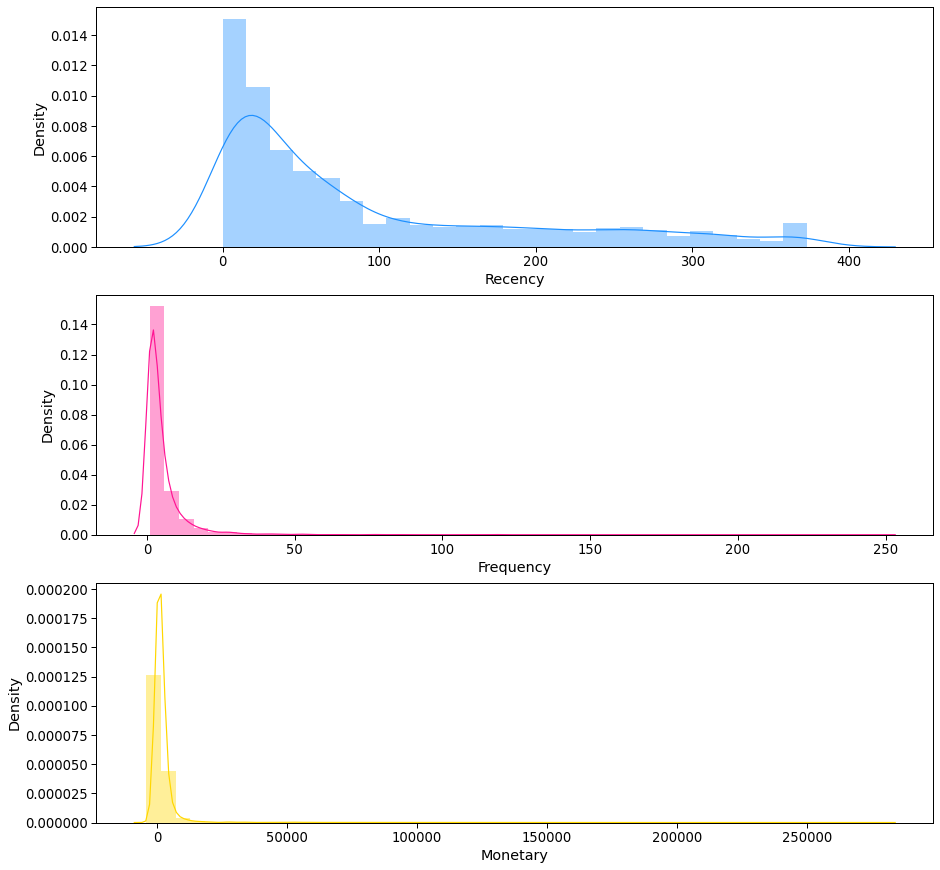

In [461]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(rfm_table.Recency , color="dodgerblue", ax=axes[0],axlabel='Recency')
sns.distplot(rfm_table.Frequency , color="deeppink", ax=axes[1],axlabel='Frequency')
sns.distplot(rfm_table.Monetary , color="gold", ax=axes[2], axlabel='Monetary')

In [462]:
rfm_table.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,91.581199,5.075480,1893.531433
std,100.772139,9.338754,8218.696204
min,0.000000,1.000000,-4287.630000
25%,16.000000,1.000000,291.795000
50%,50.000000,3.000000,644.070000
75%,143.000000,5.000000,1608.335000
max,373.000000,248.000000,279489.020000


In [492]:
rfm_table_scaled = rfm_table.copy()
# Shift all values in the column by adding absolute of minimum value to each value, thereby making each value positive.
rfm_table_scaled.Monetary = rfm_table_scaled.Monetary + abs(rfm_table_scaled.Monetary.min()) + 1
rfm_table_scaled.Recency = rfm_table_scaled.Recency + abs(rfm_table_scaled.Recency.min()) + 1
# Check the summary of new values
rfm_table_scaled.head()

,Purchase_Date,Current_Date,Recency,Frequency,Monetary
CustomerID,,,,,
12346,2011-01-18,2011-12-09,326,2,4288.63
12347,2011-12-07,2011-12-09,3,7,8598.63
12348,2011-09-25,2011-12-09,76,4,6085.87
12349,2011-11-21,2011-12-09,19,1,6046.18
12350,2011-02-02,2011-12-09,311,1,4623.03


In [574]:
rfm2 = rfm_table_scaled[['Recency', 'Frequency', 'Monetary']]

In [522]:
from sklearn.preprocessing import StandardScaler
# Taking log first because normalization forces data for negative values
log_df = np.log(rfm2)
# Normalize the data for uniform averages and means in the distribution.
scaler = StandardScaler()
normal_df = scaler.fit_transform(log_df)


In [527]:
normal_df

array([[ 1.4289457 , -0.39599241, -0.69291055],
       [-1.88947218,  0.91747719,  1.21961938],
       [ 0.39825735,  0.33074343,  0.26936054],
       ...,
       [-1.19523084,  0.0291208 , -0.58196586],
       [-1.68584776,  1.78421511,  0.37929932],
       [-0.0048643 ,  0.0291208 ,  0.2873896 ]])

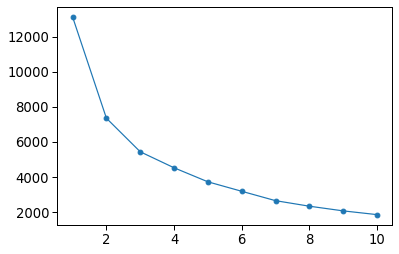

In [529]:
#find WCSS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(normal_df)
    wcss.append(kmeans.inertia_)
# plot elbow graph
plt.plot(range(1,11),wcss,marker='o')

Silhouette score for number of cluster(s) 2: 0.4405297656150766
Silhouette score for number of cluster(s) 3: 0.39677649451050456
Silhouette score for number of cluster(s) 4: 0.3380133401024639
Silhouette score for number of cluster(s) 5: 0.3626494830847667
Silhouette score for number of cluster(s) 6: 0.3649032445702833
Silhouette score for number of cluster(s) 7: 0.354671831939756
Silhouette score for number of cluster(s) 8: 0.34664985914118013
Silhouette score for number of cluster(s) 9: 0.3439470526219597
Silhouette score for number of cluster(s) 10: 0.35264410417389946
Silhouette score for number of cluster(s) 11: 0.36180993562840996


(array([0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44, 0.46]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

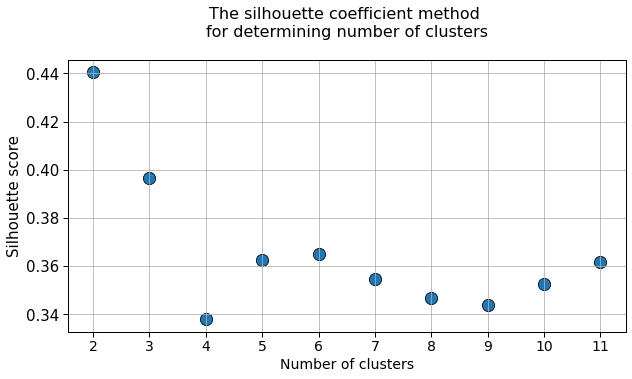

In [530]:
from sklearn.metrics import silhouette_score
wcss_silhouette = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(normal_df)
    preds = km.predict(normal_df)
    silhouette = silhouette_score(normal_df,preds)
    wcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=wcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)

In [531]:
kmeans = KMeans(n_clusters=4, random_state=1, init='k-means++')
kmeans.fit(normal_df)
cluster_labels = kmeans.labels_

In [532]:
print(f"Shape of cluster label array is {cluster_labels.shape}")
print(f"Shape of RFM segment dataframe is {rfm_segment.shape}")

Shape of cluster label array is (4372,)
Shape of RFM segment dataframe is (4372, 11)


In [533]:
Cluster_table = rfm_segment.assign(Cluster = cluster_labels)

In [534]:
Cluster_table.Cluster.value_counts()

0    1786
3    1499
2     963
1     124
Name: Cluster, dtype: int64

In [535]:
Cluster_table.sample(10)

,CustomerID,Purchase_Date,Current_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
2937,16322,2011-12-08,2011-12-09,1,2,326.75,4,2,2,422,others,3
3887,17628,2011-09-19,2011-12-09,81,1,75.75,2,1,1,211,others,0
1217,13983,2011-11-10,2011-12-09,29,13,2590.46,3,4,4,344,Loyal Customers,2
1829,14819,2011-10-06,2011-12-09,64,2,272.07,2,2,1,221,others,0
1782,14755,2011-11-30,2011-12-09,9,12,4965.38,4,4,4,444,Best Customers,2
944,13601,2011-10-25,2011-12-09,45,2,693.32,3,2,3,323,others,3
2146,15249,2011-11-08,2011-12-09,31,15,6657.36,3,4,4,344,Loyal Customers,2
3134,16591,2011-10-02,2011-12-09,68,1,213.50,2,1,1,211,others,0
4079,17888,2011-11-21,2011-12-09,18,10,515.73,3,4,2,342,others,2
687,13247,2011-11-22,2011-12-09,17,4,501.12,3,3,2,332,others,3


In [536]:
Cluster_table[Cluster_table.Cluster == 3].sample(5)

,CustomerID,Purchase_Date,Current_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
1755,14714,2011-11-15,2011-12-09,24,1,160.19,3,1,1,311,others,3
808,13417,2011-12-05,2011-12-09,4,2,640.83,4,2,2,422,others,3
2149,15253,2011-11-23,2011-12-09,16,6,915.30,4,4,3,443,Recent Customers,3
3711,17388,2011-09-23,2011-12-09,77,4,1259.56,2,3,3,233,others,3
871,13502,2011-11-23,2011-12-09,16,3,292.00,4,2,2,422,others,3


In [537]:
Cluster_table[Cluster_table.Cluster == 2].sample(5)

,CustomerID,Purchase_Date,Current_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
3374,16912,2011-11-16,2011-12-09,23,14,2508.87,3,4,4,344,Loyal Customers,2
3590,17220,2011-11-15,2011-12-09,24,14,3187.55,3,4,4,344,Loyal Customers,2
1043,13743,2011-12-07,2011-12-09,2,8,1340.15,4,4,3,443,Recent Customers,2
442,12910,2011-11-16,2011-12-09,23,8,3075.04,3,4,4,344,Loyal Customers,2
238,12637,2011-10-03,2011-12-09,67,10,5934.25,2,4,4,244,Almost Lost,2


In [538]:
Cluster_table[Cluster_table.Cluster == 1].sample(5)

,CustomerID,Purchase_Date,Current_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
157,12540,2011-11-20,2011-12-09,19,19,13309.04,3,4,4,344,Loyal Customers,1
3741,17428,2011-12-09,2011-12-09,0,33,17078.45,4,4,4,444,Best Customers,1
436,12901,2011-12-01,2011-12-09,8,36,16293.10,4,4,4,444,Best Customers,1
568,13089,2011-12-07,2011-12-09,2,118,57322.13,4,4,4,444,Best Customers,1
3950,17706,2011-12-05,2011-12-09,4,22,10097.37,4,4,4,444,Best Customers,1


In [539]:
Cluster_table[Cluster_table.Cluster == 0].sample(5)

,CustomerID,Purchase_Date,Current_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
2083,15165,2010-12-01,2011-12-09,373,1,487.75,1,1,2,112,others,0
1149,13886,2011-09-29,2011-12-09,71,1,243.56,2,1,1,211,others,0
183,12574,2011-01-28,2011-12-09,315,1,218.45,1,1,1,111,others,0
685,13245,2011-10-20,2011-12-09,50,1,430.50,3,1,2,312,others,0
3908,17654,2011-03-07,2011-12-09,277,1,117.55,1,1,1,111,others,0


,CustomerID,Purchase_Date,Current_Date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
0,12346,2011-01-18,2011-12-09,325,2,0.00,1,2,1,121,others,0
1,12347,2011-12-07,2011-12-09,2,7,4310.00,4,4,4,444,Best Customers,2
2,12348,2011-09-25,2011-12-09,75,4,1797.24,2,3,4,234,others,3
3,12349,2011-11-21,2011-12-09,18,1,1757.55,3,1,4,314,others,3
4,12350,2011-02-02,2011-12-09,310,1,334.40,1,1,2,112,others,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,2011-03-07,2011-12-09,277,1,180.60,1,1,1,111,others,0
4368,18281,2011-06-12,2011-12-09,180,1,80.82,1,1,1,111,others,0
4369,18282,2011-12-02,2011-12-09,7,3,176.60,4,2,1,421,others,3
4370,18283,2011-12-06,2011-12-09,3,16,2045.53,4,4,4,444,Best Customers,2


<AxesSubplot:xlabel='Cluster', ylabel='CustomerID'>

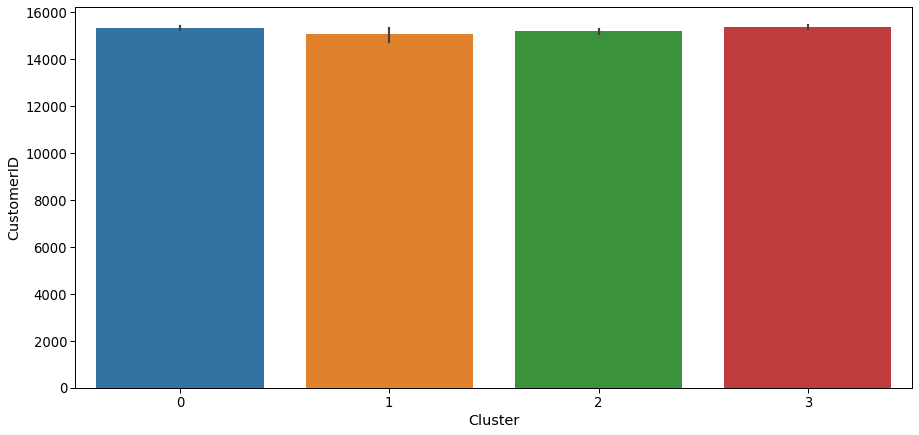

In [565]:
plt.figure(figsize=(15,7))
sns.barplot(x=Cluster_table.Cluster,y=Cluster_table.CustomerID,data=Cluster_table)